#**說明**
此文件使用"SD.xlsx"作為輸入資料，此檔案位於"data"資料夾。並使用交叉驗證，第一場到最後一場事件輪流做為測試資料。測試結果的折線圖將輸出到"output"資料夾。訓練資料的預測值與觀測值資料將寫入"RES-train.xlsx"，測試資料的預測值與觀測值資料將寫入"RES-test.xlsx"，並輸出到"output"資料夾。

#**前置作業**

###引入模組

In [106]:
import data_processor as dp
from my_models import My_BPNN, My_SVM, My_CNN, My_LSTM, My_GRU
import plotting_utils as pltUT
import RES_gen
import index_processor as idp
from tensorflow.keras.optimizers.schedules import ExponentialDecay

###定義路徑參數

In [107]:
# 檔案、資料夾路徑參數
PROJECT_FOLDER = 'C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/'  # 專案資料夾的路徑
AD_FILE = PROJECT_FOLDER + 'data/AD.xlsx'
IOLAG_FILE = PROJECT_FOLDER + 'data/IOLag.xlsx'   
SD_FILE = PROJECT_FOLDER + 'data/SD.xlsx'                                   # 資料檔案路徑
DATA_FOLDER = PROJECT_FOLDER + 'data/'                                      # 存放資料的資料夾路徑
WEIGHTS_FOLDER = PROJECT_FOLDER + 'weights/'                                # 權重檔的資料夾路徑
OUTPUT_FOLDER = PROJECT_FOLDER + 'outputs/'                                 # 輸出結果的資料夾路徑
HYDROGRAPH_FOLDER = PROJECT_FOLDER + 'outputs/Hydrographs/'                 # 歷線圖的資料夾路徑
SCATTER_PLOT_FOLDER = PROJECT_FOLDER + 'outputs/Scatter_Plots/'             # 散點圖的資料夾路徑

###定義模型參數

In [108]:
# 模型參數
epochs = 200            # 迭代次數(要讓模型看幾次訓練資料)
batch_size = 16         # 批次大小(每看多少筆資料更新一次權重)
lr = 0.001              # 學習速率
loss_fn = 'mse'         # 損失函數

# 使用learning rate decay
initial_learning_rate = 0.001
lr = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,   # 多少batch/step衰減一次
    decay_rate=0.95,
    staircase=True)

###連接雲端硬碟

In [109]:
# from google.colab import drive
# drive.mount('/content/drive' )

#**主程式**

###讀取資料、定義所需列表

In [110]:
events = dp.load_data(AD_FILE, IOLAG_FILE)              # 載入資料
num_events = len(events)                    # 事件數量
event_order = list(range(1, num_events+1))  # 事件排列順序

boundaries = []     # 用於儲存事件分割邊界
event_orders = []   # 用於儲存每次訓練的事件排列順序

RES_train = []      # 用於儲存訓練資料的預測結果
RES_test = []       # 用於儲存測試資料的預測結果

###訓練模型、產生圖表


[第 1/5 次訓練]
▶ 以第 2, 3, 4, 5 場事件為訓練資料，以第 1 場事件為測試資料

Epoch 1/200
16/16 [==============================] - 5s 87ms/step - loss: 0.1113 - val_loss: 0.0953
Epoch 2/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0781 - val_loss: 0.0796
Epoch 3/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0638 - val_loss: 0.0798
Epoch 4/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0617 - val_loss: 0.0331
Epoch 5/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0644 - val_loss: 0.0630
Epoch 6/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0518 - val_loss: 0.0335
Epoch 7/200
16/16 [==============================] - 0s 28ms/step - loss: 0.0517 - val_loss: 0.0358
Epoch 8/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0462 - val_loss: 0.0352
Epoch 9/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0449 - val_loss: 0.0309
Epoch 10/200
16/16 [===========================

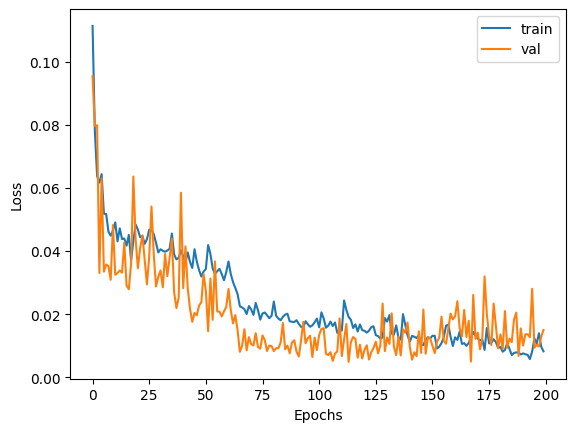

Training weights saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/weights/Weights_EV01.h5
2/2 [==============================] - 0s 13ms/step


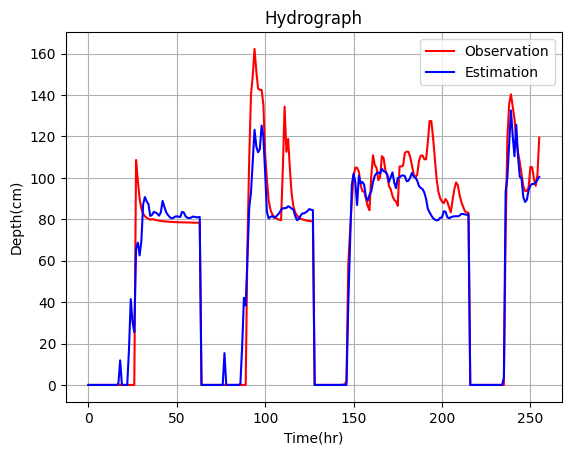

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-train_EV01.png


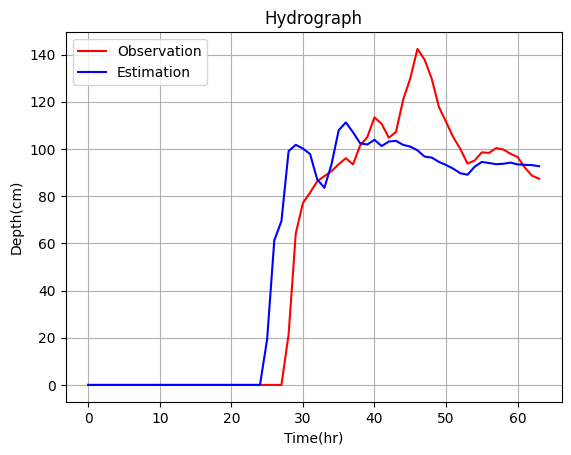

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-test_EV01.png


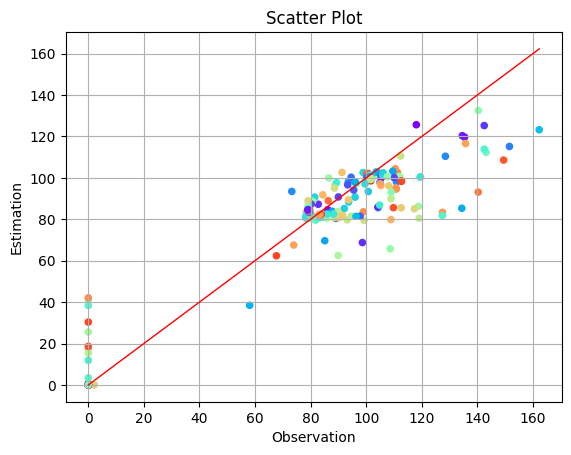

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-train_EV01.png


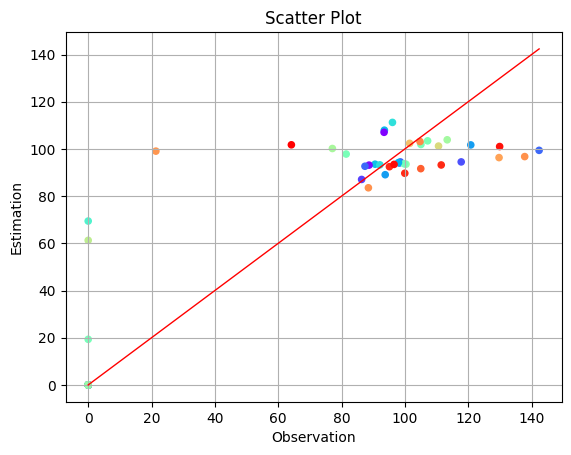

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-test_EV01.png

[第 2/5 次訓練]
▶ 以第 1, 3, 4, 5 場事件為訓練資料，以第 2 場事件為測試資料

Epoch 1/200
16/16 [==============================] - 4s 86ms/step - loss: 0.1380 - val_loss: 0.0607
Epoch 2/200
16/16 [==============================] - 0s 26ms/step - loss: 0.1060 - val_loss: 0.0770
Epoch 3/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0901 - val_loss: 0.0759
Epoch 4/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0804 - val_loss: 0.0525
Epoch 5/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0642 - val_loss: 0.0516
Epoch 6/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0497 - val_loss: 0.0695
Epoch 7/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0492 - val_loss: 0.0555
Epoch 8/200
16/16 [==============================] - 0s 26ms/step - loss: 0.0415 - val_loss: 0.0645
Epoch 9/200
16/16 [===========

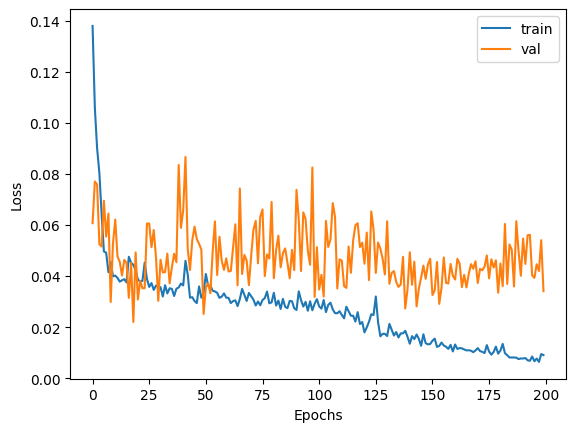

Training weights saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/weights/Weights_EV02.h5
2/2 [==============================] - 0s 16ms/step


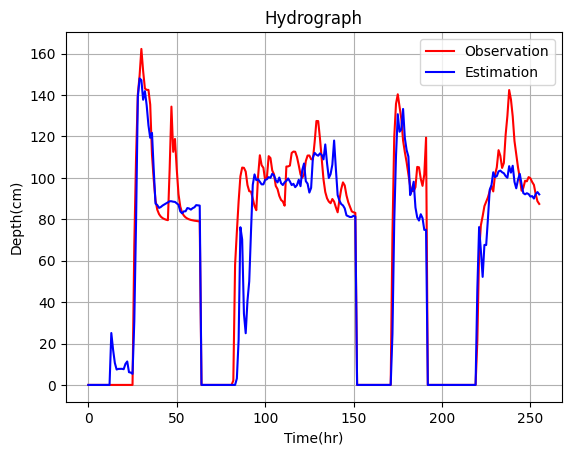

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-train_EV02.png


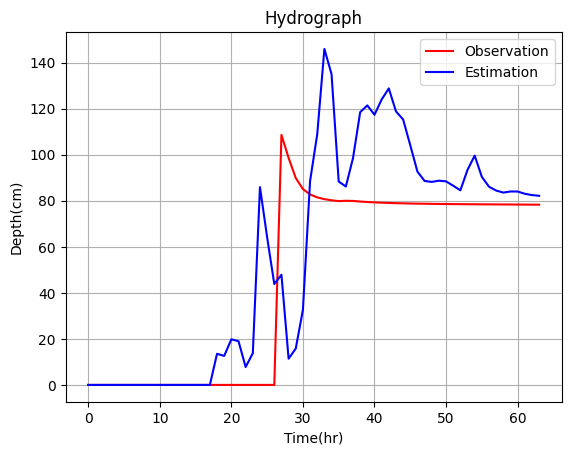

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-test_EV02.png


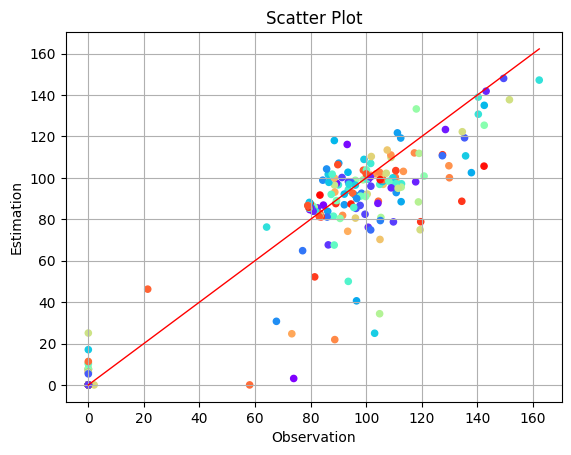

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-train_EV02.png


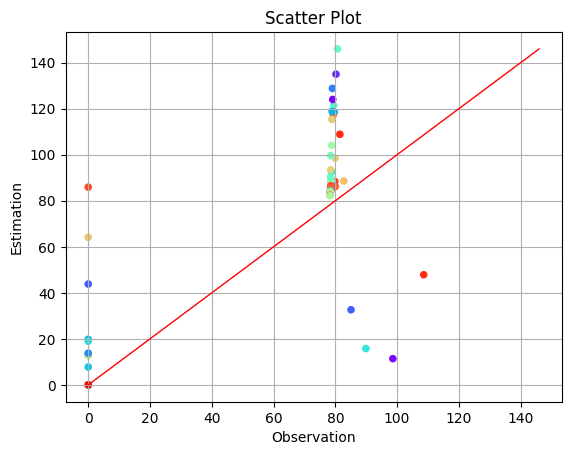

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-test_EV02.png

[第 3/5 次訓練]
▶ 以第 1, 2, 4, 5 場事件為訓練資料，以第 3 場事件為測試資料

Epoch 1/200
16/16 [==============================] - 5s 124ms/step - loss: 0.1082 - val_loss: 0.1020
Epoch 2/200
16/16 [==============================] - 0s 28ms/step - loss: 0.0814 - val_loss: 0.1081
Epoch 3/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0829 - val_loss: 0.0681
Epoch 4/200
16/16 [==============================] - 0s 29ms/step - loss: 0.0673 - val_loss: 0.1155
Epoch 5/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0413 - val_loss: 0.0857
Epoch 6/200
16/16 [==============================] - 0s 28ms/step - loss: 0.0398 - val_loss: 0.0782
Epoch 7/200
16/16 [==============================] - 0s 28ms/step - loss: 0.0353 - val_loss: 0.0912
Epoch 8/200
16/16 [==============================] - 0s 27ms/step - loss: 0.0362 - val_loss: 0.0930
Epoch 9/200
16/16 [==========

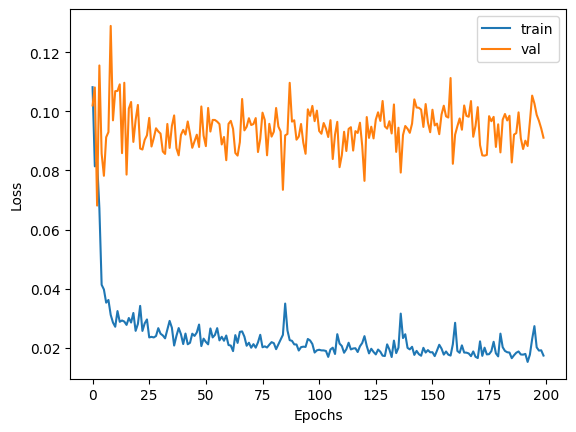

Training weights saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/weights/Weights_EV03.h5
2/2 [==============================] - 0s 14ms/step


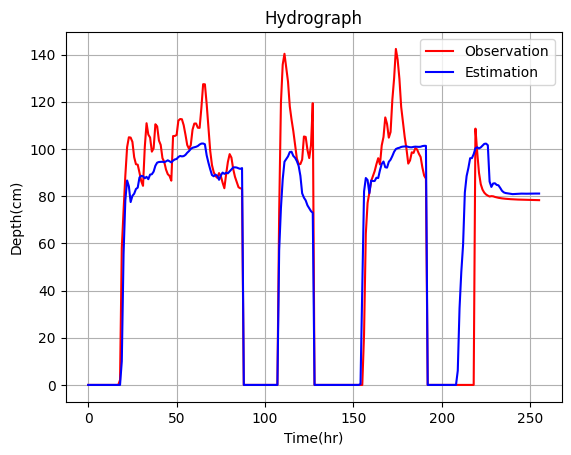

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-train_EV03.png


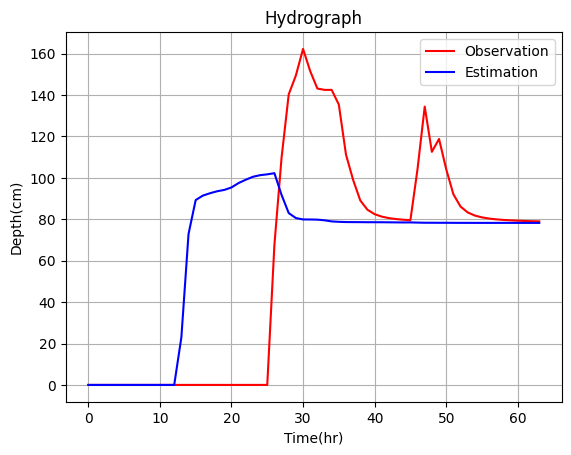

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-test_EV03.png


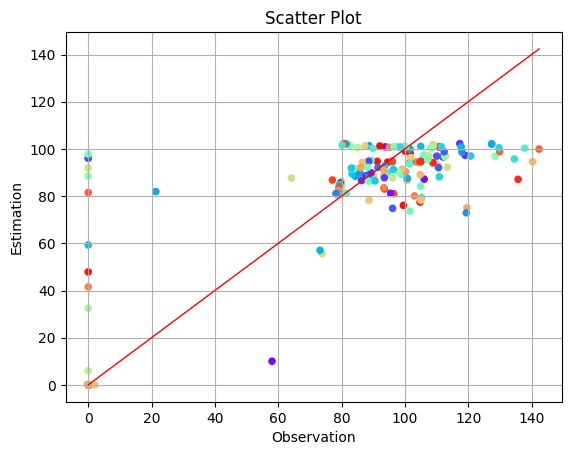

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-train_EV03.png


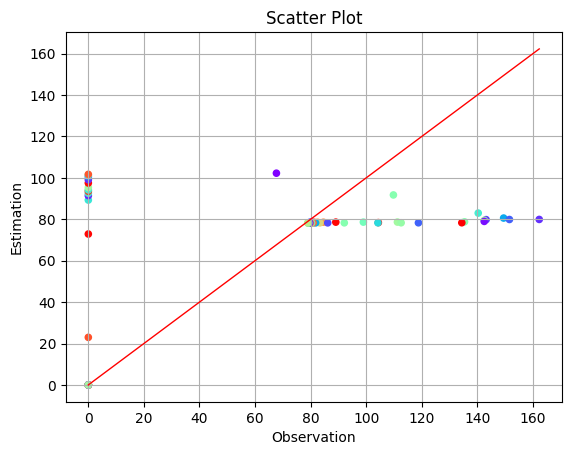

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-test_EV03.png

[第 4/5 次訓練]
▶ 以第 1, 2, 3, 5 場事件為訓練資料，以第 4 場事件為測試資料

Epoch 1/200
15/15 [==============================] - 5s 97ms/step - loss: 0.1108 - val_loss: 0.0788
Epoch 2/200
15/15 [==============================] - 1s 34ms/step - loss: 0.0778 - val_loss: 0.0630
Epoch 3/200
15/15 [==============================] - 1s 34ms/step - loss: 0.0659 - val_loss: 0.0526
Epoch 4/200
15/15 [==============================] - 1s 34ms/step - loss: 0.0606 - val_loss: 0.0447
Epoch 5/200
15/15 [==============================] - 1s 34ms/step - loss: 0.0618 - val_loss: 0.0557
Epoch 6/200
15/15 [==============================] - 1s 35ms/step - loss: 0.0478 - val_loss: 0.0351
Epoch 7/200
15/15 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0467
Epoch 8/200
15/15 [==============================] - 1s 34ms/step - loss: 0.0519 - val_loss: 0.0469
Epoch 9/200
15/15 [===========

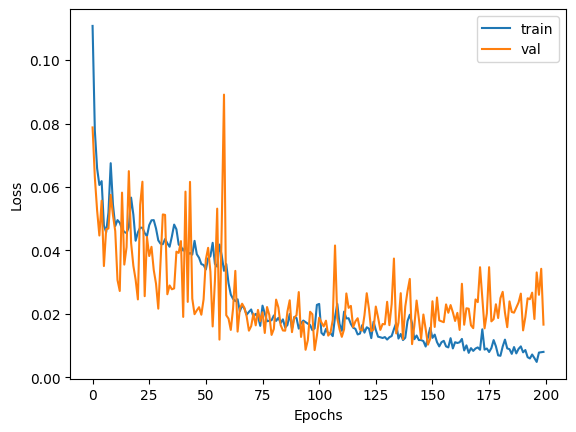

Training weights saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/weights/Weights_EV04.h5
3/3 [==============================] - 0s 12ms/step


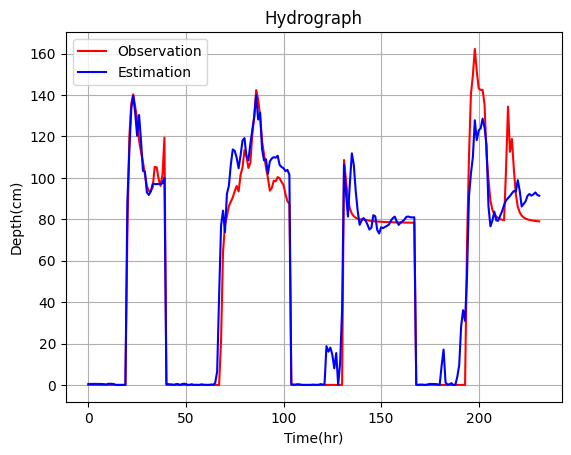

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-train_EV04.png


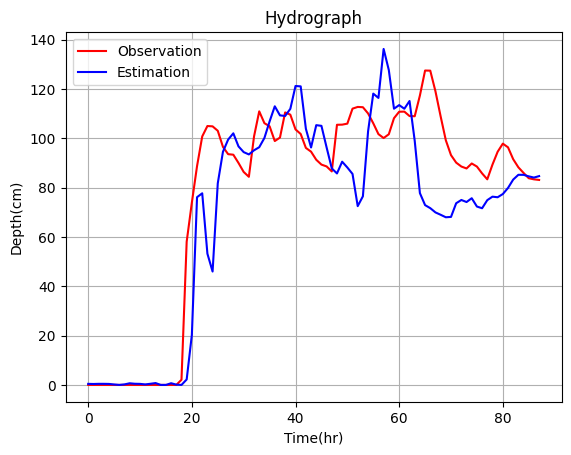

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-test_EV04.png


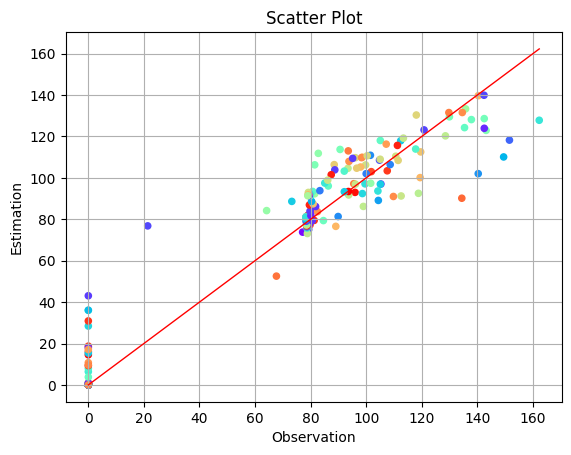

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-train_EV04.png


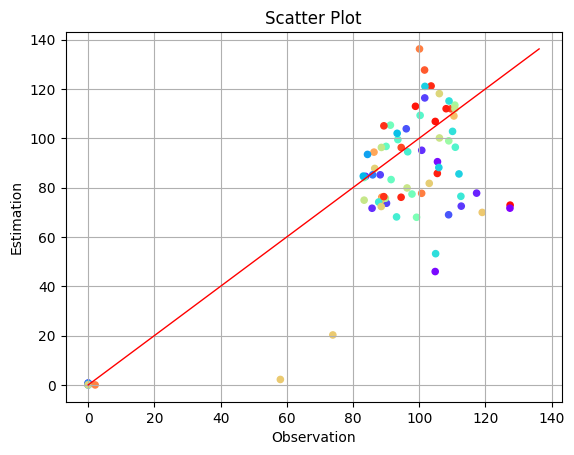

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-test_EV04.png

[第 5/5 次訓練]
▶ 以第 1, 2, 3, 4 場事件為訓練資料，以第 5 場事件為測試資料

Epoch 1/200
18/18 [==============================] - 6s 85ms/step - loss: 0.1149 - val_loss: 0.1014
Epoch 2/200
18/18 [==============================] - 1s 32ms/step - loss: 0.0683 - val_loss: 0.0864
Epoch 3/200
18/18 [==============================] - 1s 33ms/step - loss: 0.0573 - val_loss: 0.0736
Epoch 4/200
18/18 [==============================] - 1s 32ms/step - loss: 0.0432 - val_loss: 0.0500
Epoch 5/200
18/18 [==============================] - 1s 34ms/step - loss: 0.0417 - val_loss: 0.0816
Epoch 6/200
18/18 [==============================] - 1s 32ms/step - loss: 0.0442 - val_loss: 0.0707
Epoch 7/200
18/18 [==============================] - 1s 32ms/step - loss: 0.0483 - val_loss: 0.0725
Epoch 8/200
18/18 [==============================] - 1s 33ms/step - loss: 0.0467 - val_loss: 0.0591
Epoch 9/200
18/18 [===========

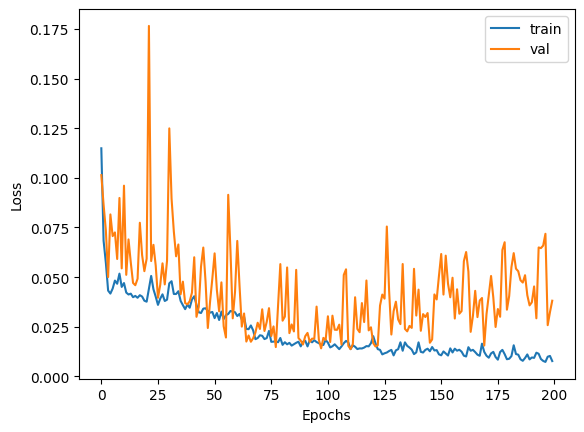

Training weights saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/weights/Weights_EV05.h5
2/2 [==============================] - 0s 8ms/step


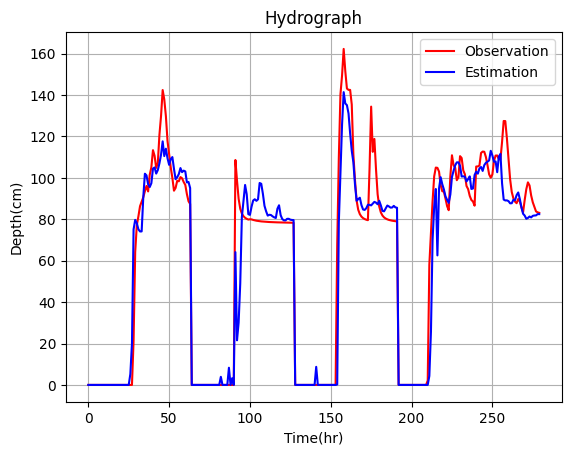

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-train_EV05.png


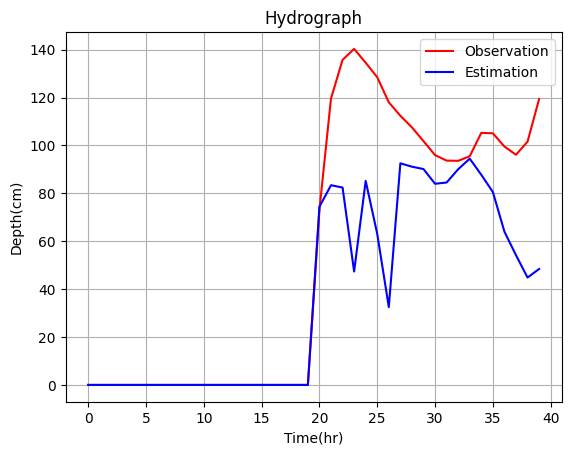

Hydrograph saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Hydrographs/RES-test_EV05.png


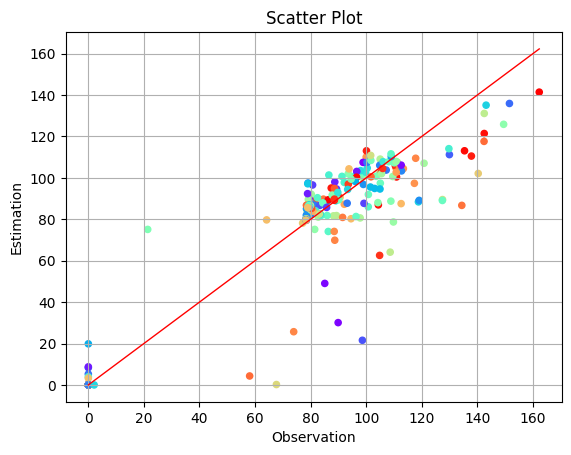

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-train_EV05.png


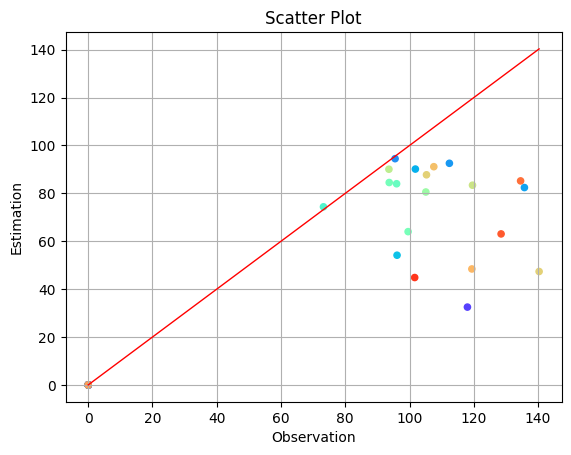

Scatter plot saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Scatter_Plots/RES-test_EV05.png


In [111]:
# 交叉驗證(使不同事件輪流當測試資料)

for i in range(num_events):

    #***************************************************************************
    # 資料前處理
    #***************************************************************************
    events, event_order, boundary, split_boundary = dp.reorder_events(events, event_order)  # 整理輸入資料順序以便輸入模型
    event_orders.append(event_order)                                                        # 紀錄資料的順序  
    boundaries.append(boundary)                                                             # 紀錄資料長度的分割邊界 

    # 產生輸入模型的資料
    X, Y = dp.create_sequences(events)                                          # 產生參考資料序列(X)及標籤資料序列(Y)
    nX, nY = dp.normalize(X), dp.normalize(Y)                                   # 正規化
    X_train, Y_train, X_test, Y_test = dp.split_data(nX, nY, split_boundary)    # 分割訓練及測試資料
    steps, features = X_train.shape[1], X_train.shape[2]

    weights_path = WEIGHTS_FOLDER + 'Weights_EV' + "%02d" % (i+1) + '.h5'       # 輸出的權重檔路徑

    #***************************************************************************
    # 訓練模型
    #***************************************************************************
    print('\n[第 %d/%d 次訓練]' %(i+1, num_events))
    print('▶ 以第 ' + (', '.join(str(x) for x in sorted(event_order[:-1]))) + ' 場事件為訓練資料，以第 ' + str(event_order[-1]) + ' 場事件為測試資料\n')
    # --------------------------------------------------------------------------
    # SVM
    # --------------------------------------------------------------------------
    # # 傳統方法的參考資料須調整資料維度
    # X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
    # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
    # Y_train = Y_train.ravel()
    # Y_test = Y_test.ravel()

    # # 創建模型
    # model = My_SVM()

    # # 訓練模型
    # model = model.train(X_train, Y_train)

    # # 預測
    # Y_train_predict = model.predict(X_train)
    # Y_predict = model.predict(X_test)

    # --------------------------------------------------------------------------
    # LSTM
    # --------------------------------------------------------------------------
    # 創建模型
    model = My_LSTM(steps, features)

    # 訓練模型
    model = model.train(X_train, Y_train, X_test, Y_test, lr, loss_fn, epochs, batch_size)

    # 儲存模型
    model.save(weights_path)
    print('Training weights saved in ' + weights_path)

    # 預測
    Y_train_predict = model.predict(X_train) # 以訓練資料預測
    Y_predict = model.predict(X_test)

    #***************************************************************************
    # 資料後處理
    #***************************************************************************
    # 反正規化並將所有負值改為0
    obv_train = dp.convert_negative_to_zero(dp.denormalize(Y_train, Y)) 
    est_train = dp.convert_negative_to_zero(dp.denormalize(Y_train_predict, Y))
    obv_test = dp.convert_negative_to_zero(dp.denormalize(Y_test, Y))
    est_test = dp.convert_negative_to_zero(dp.denormalize(Y_predict, Y))

    # print(obv_train.shape, est_train.shape, obv_test.shape, est_test.shape)

    # 儲存預測結果
    RES_train.append([obv_train, est_train])
    RES_test.append([obv_test, est_test]) 

    #***************************************************************************
    # 畫圖
    #***************************************************************************
    fig_names = ['Hydrograph', 'Scatter plot']
    fig_folders = {'Hydrograph':HYDROGRAPH_FOLDER, 'Scatter plot':SCATTER_PLOT_FOLDER}

    pltUT.draw_all(fig_names, fig_folders, i, obv_train, est_train, obv_test, est_test)


###輸出結果 (寫入excel檔)

In [112]:
RES_train_path = OUTPUT_FOLDER + 'RES-train.xlsx'
RES_test_path = OUTPUT_FOLDER + 'RES-test.xlsx'
eventWithMaxVal = dp.get_eventWithMaxVal(Y, boundaries)

RES_gen.gen_RES_train(RES_train, events, eventWithMaxVal, boundaries, event_orders, RES_train_path)
RES_gen.gen_RES_test(RES_test, events, eventWithMaxVal, RES_test_path)

Result saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/RES-train.xlsx
Result saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/RES-test.xlsx


Index

In [113]:
index_names = ['RMSE', 'MAE', 'CE', 'CC', 'EQp', 'ETp']   # 要計算的指標
Index_path = OUTPUT_FOLDER + 'Index.xlsx'

index_train, index_test = idp.get_all_indices(num_events, RES_train, RES_test, index_names)
idp.write_Index(num_events, eventWithMaxVal, index_names, index_train, index_test, Index_path)

Result saved in C:/Users/jason/Desktop/NSTC_Plan/Inundation_Forcasting/outputs/Index.xlsx
